## Estadística Aplicada

3er parcial

Oscar Gabriel Martínez Rodríguez 1962702

Grupo 43

Has sido contratado como asesor del director de Metrorrey, la empresa encargada de administrar el metro en el área metropolitana de Monterrey, NL.

El director te ha proporcionado la siguiente base de datos con la información mensual del número de pasajeros y el ingreso generado por pasajes

In [1]:
## cargar librerías base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# aquí ir cargando librerías específicas
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf,plot_predict
from statsmodels.tsa.arima.model import  ARIMA
## pmd arima
import pmdarima as pm

In [3]:
plt.rcParams['figure.figsize'] = (10,6)

In [4]:
# DATOS
data = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/datos_metrorrey.csv')
data.head()

,mes,miles de pasajeros,ingresos (miles de pesos)
0,1995/01,3439.0,3240.0
1,1995/02,2879.0,3623.0
2,1995/03,3103.0,3990.0
3,1995/04,3491.0,3321.0
4,1995/05,3109.0,3777.0


**1.** Muestre de qué tipo son las variables del dataframe, revise que no haya missing values (de haberlos imputar valores).  Cersiorarse que exista una variable fecha, que sea el index y tenga una frecuencia asignada.

In [5]:
data.dtypes

mes                           object
miles de pasajeros           float64
ingresos (miles de pesos)    float64
dtype: object

In [6]:
data.isnull().sum()

mes                          0
miles de pasajeros           0
ingresos (miles de pesos)    0
dtype: int64

No hay missing values.

In [7]:
data['mes'] = pd.to_datetime(data['mes'], format='%Y/%m')
data = data.set_index('mes')
data

,miles de pasajeros,ingresos (miles de pesos)
mes,,
1995-01-01,3439.000,3240.000
1995-02-01,2879.000,3623.000
1995-03-01,3103.000,3990.000
1995-04-01,3491.000,3321.000
1995-05-01,3109.000,3777.000
...,...,...
2023-04-01,9523.669,38799.657
2023-05-01,11891.646,58511.798
2023-06-01,10657.712,55684.063


In [8]:
data = data.asfreq('MS')

In [9]:
data.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01'],
              dtype='datetime64[ns]', name='mes', length=344, freq='MS')

**2.** Análisis exploratorio. Utilizando código de Python genera un print() para cada una de la siguiente información:

a) Rango de fechas

In [10]:
inicio = data.index.min().strftime('%Y-%m')

In [11]:
fin = data.index.max().strftime('%Y-%m')

In [12]:
print(f"Las fechas abarcan desde {inicio} hasta {fin} (año-mes)")

Las fechas abarcan desde 1995-01 hasta 2023-08 (año-mes)


b) Número de observaciones

In [13]:
print(f"El dataframe tiene {data['miles de pasajeros'].count()} observaciones.")

El dataframe tiene 344 observaciones.


c) Valor mínimo y valor máximo del número de pasajeros.

In [14]:
min_pas = data['miles de pasajeros'].min()
max_pas = data['miles de pasajeros'].max()
print(f"El mínimo número de pasajeros es {min_pas * 1000}, y el máximo es {max_pas * 1000}")

El mínimo número de pasajeros es 2397000.0, y el máximo es 17534523.0


**3.** Grafica lo siguiente

a) La serie de miles de pasajeros.

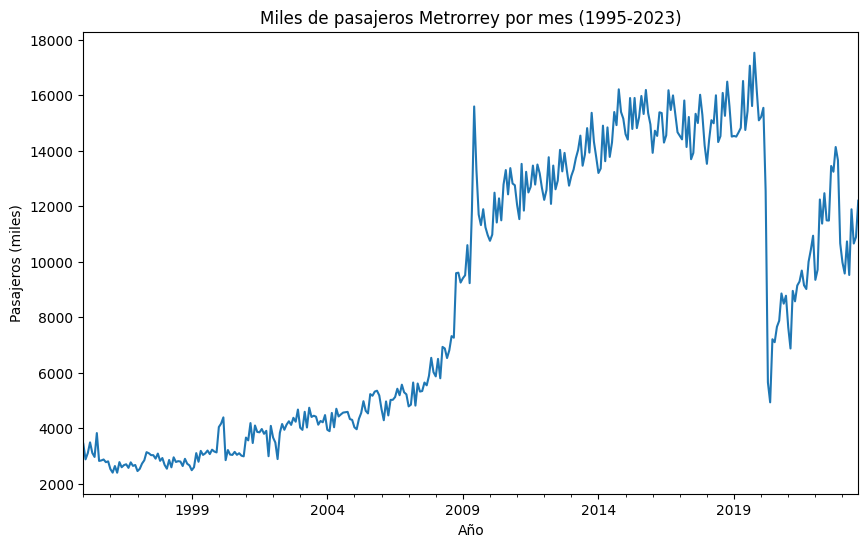

In [15]:
data['miles de pasajeros'].plot()
plt.title('Miles de pasajeros Metrorrey por mes (1995-2023)')
plt.ylabel('Pasajeros (miles)')
plt.xlabel('Año')
plt.show()

b) Una media móvil centrada a 7 meses, y explica si la serie tiene tendencia o no, y si existen ciclos (subidas y caídas) y que se debe cada uno.

In [16]:
data['PMC-7'] = data['miles de pasajeros'].rolling(7, center = True).mean()
data.head(10)

,miles de pasajeros,ingresos (miles de pesos),PMC-7
mes,,,
1995-01-01,3439.0,3240.0,NaN
1995-02-01,2879.0,3623.0,NaN
1995-03-01,3103.0,3990.0,NaN
1995-04-01,3491.0,3321.0,3259.000000
1995-05-01,3109.0,3777.0,3170.857143
1995-06-01,2966.0,3614.0,3165.285714
1995-07-01,3826.0,3669.0,3132.571429
1995-08-01,2822.0,3666.0,3030.714286
1995-09-01,2840.0,3693.0,2987.571429


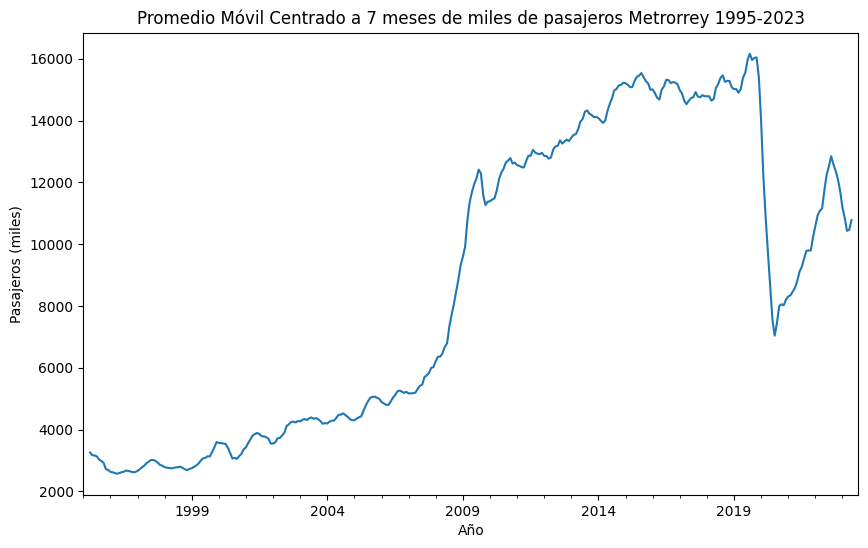

In [17]:
data['PMC-7'].plot()
plt.title('Promedio Móvil Centrado a 7 meses de miles de pasajeros Metrorrey 1995-2023')
plt.ylabel('Pasajeros (miles)')
plt.xlabel('Año')
plt.show()

La serie tiene tendencia creciente a excepción de 2020, año en el cual se vio afectado el promedio de número de pasajeros debido a la pandemia de COVID-19, aunque después volvió a subir su número.

En cuanto a ciclos, se nota tanto una gran subida alrededor del 2008 y una gran bajada en 2020.  El incremento notable en el promedio de pasajeros durante 2008 se debe a la integración de nuevas estaciones a la línea 2 del metro:  el 31 de octubre de 2007 integrando Regina, Niños Héroes y Universidad, y en octubre de 2008 Anahuac, San Nicolás, Santiago Tapia y Sendero, comunicando Monterrey, San Nicolás y Escobedo.

Para el notorio descenso en 2020, se debe principalmente a la pandemia por COVID-19, en la que se paralizó la ciudad, al no salir de casa si no era necesario para hacer actividades, por lo cual se notó un gran bajón en el número de personas que tomaban el metro.

**4.** El director de Metrorrey planea hacer mantenimiento a las estaciones y los vagones, pero no sabe la fecha adecuada para hacerlo. Utiliza el modelo ETS para obtener el componente estacional de la serie y señala el mes o meses adecuados para dar mantenimiento.

Se usa modelo 'mult' pues se quiere ver cuánto varía proporcionalmente al valor mismo de la serie sobre el punto en el que se encuentre.  Ver cuánto sube o baja dependiendo del valor mismo de la serie.

In [18]:
ets = seasonal_decompose(data['miles de pasajeros'], model = 'mult')

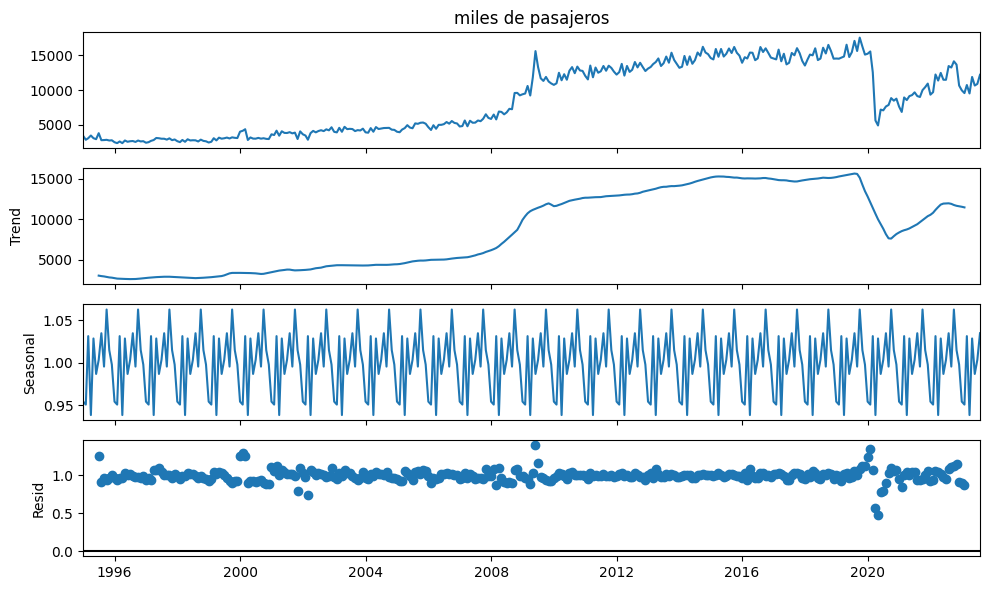

In [19]:
ets.plot()
plt.show()

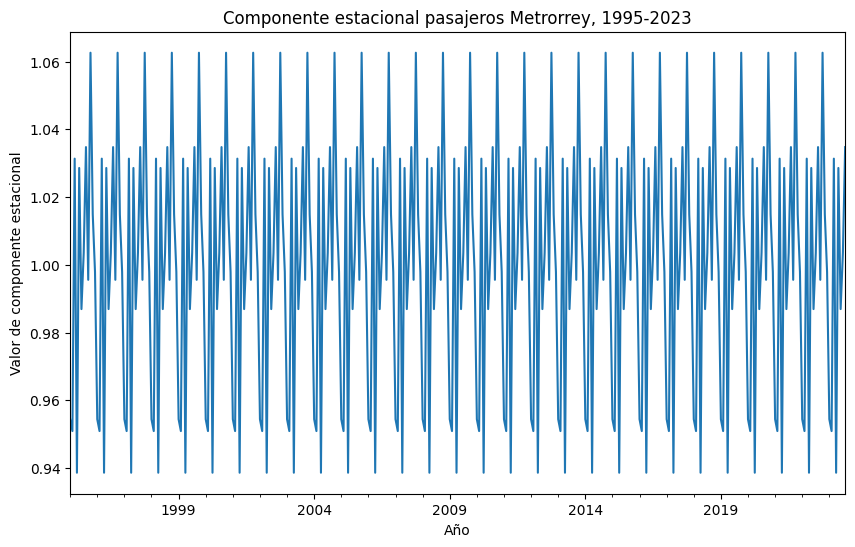

In [20]:
#componente estacional
ets.seasonal.plot()
plt.title('Componente estacional pasajeros Metrorrey, 1995-2023')
plt.ylabel('Valor de componente estacional')
plt.xlabel('Año')
plt.show()

In [21]:
estacional = ets.seasonal.head(24)
estacional

mes
1995-01-01    0.954408
1995-02-01    0.950919
1995-03-01    1.031340
1995-04-01    0.938619
1995-05-01    1.028585
1995-06-01    0.986927
1995-07-01    1.003497
1995-08-01    1.034753
1995-09-01    0.995570
1995-10-01    1.062610
1995-11-01    1.014896
1995-12-01    0.997875
1996-01-01    0.954408
1996-02-01    0.950919
1996-03-01    1.031340
1996-04-01    0.938619
1996-05-01    1.028585
1996-06-01    0.986927
1996-07-01    1.003497
1996-08-01    1.034753
1996-09-01    0.995570
1996-10-01    1.062610
1996-11-01    1.014896
1996-12-01    0.997875
Freq: MS, Name: seasonal, dtype: float64

Para poder realizar mantenimiento a las estaciones y vagones lo más indicado es realizarlo cuando hay una menor cantidad de pasajeros, para alterar lo menos posible el servicio. 

Apreciando los picos de cada año, la temporada adecuada para realizar este mantenimiento sería a inicio de año, durante el periodo de enero y febrero, o específicamente durante abril, pues es el mes con el componente estacional más bajo.

**5.** El director de Metrorrey quiere saber los ingresos por pasaje y el número de pasajeros los siguientes 5 meses. Utiliza el método de Holt-Winters para pronosticar el número de pasajeros los próximos 5 meses, cada pronóstico multiplícalo por $7.1 para tener un estimado de los ingresos.

In [22]:
data['hold-winters'] = ExponentialSmoothing(data['miles de pasajeros'], trend = 'mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues

c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [23]:
data['hold-winters']

mes
1995-01-01     2762.714329
1995-02-01     3314.686616
1995-03-01     3242.226842
1995-04-01     2880.694412
1995-05-01     3846.607402
                  ...     
2023-04-01     9547.424923
2023-05-01    10420.392806
2023-06-01    12083.418919
2023-07-01    10988.177777
2023-08-01    11706.056494
Freq: MS, Name: hold-winters, Length: 344, dtype: float64

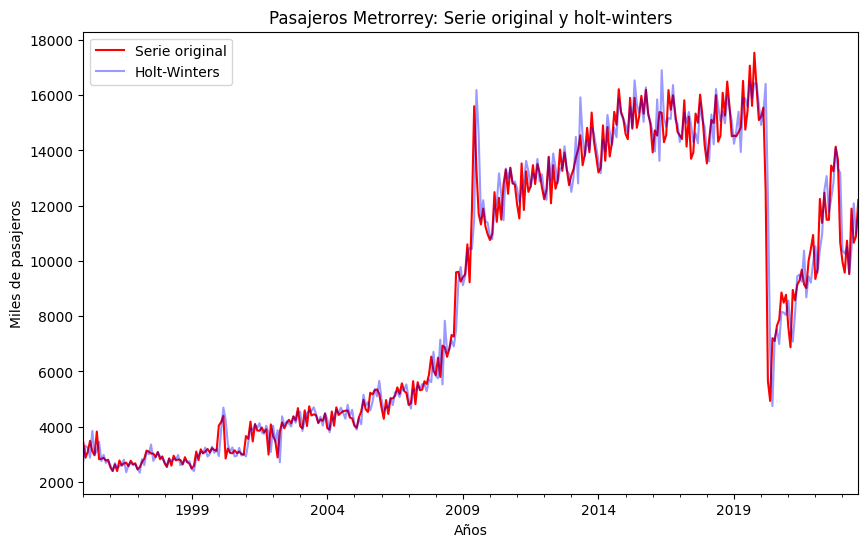

In [24]:
data['miles de pasajeros'].plot(color = 'red', label = 'Serie original')
data['hold-winters'].plot(color = 'blue', label = 'Holt-Winters', alpha = 0.4)
plt.title('Pasajeros Metrorrey: Serie original y holt-winters')
plt.ylabel('Miles de pasajeros')
plt.xlabel('Años')
plt.legend()
plt.show()

In [25]:
data.tail()

,miles de pasajeros,ingresos (miles de pesos),PMC-7,hold-winters
mes,,,,
2023-04-01,9523.669,38799.657,10464.836857,9547.424923
2023-05-01,11891.646,58511.798,10782.866714,10420.392806
2023-06-01,10657.712,55684.063,NaN,12083.418919
2023-07-01,10894.497,56378.304,NaN,10988.177777
2023-08-01,12201.982,57821.901,NaN,11706.056494


In [26]:
#pronosticar con holt winters
hw_model = ExponentialSmoothing(data['miles de pasajeros'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [27]:
#pronosticar a 5 meses y multiplicar por 7.1 (tarifa metro)
pronostico_5 = hw_model.forecast(5) * 7.1

In [28]:
print(f"Los pronósticos de miles de pasajeros son:\n{(hw_model.forecast(5)).round(2)}\n\nLos pronósticos de ingresos (miles de pesos) para los siguientes 5 meses son: \n{pronostico_5.round(2)}")

Los pronósticos de miles de pasajeros son:
2023-09-01    11552.43
2023-10-01    12209.85
2023-11-01    11483.30
2023-12-01    10782.87
2024-01-01    10391.56
Freq: MS, dtype: float64

Los pronósticos de ingresos (miles de pesos) para los siguientes 5 meses son: 
2023-09-01    82022.24
2023-10-01    86689.95
2023-11-01    81531.45
2023-12-01    76558.38
2024-01-01    73780.10
Freq: MS, dtype: float64


**6.** Realiza un pronóstico de los miles de pasajeros con el modelo ARIMA cumpliendo los siguientes pasos:

a) Realiza una prueba de raíz unitaria a la serie original.

In [29]:
prueba_adf = adfuller(data['miles de pasajeros'])
pvalue = prueba_adf[1]
pvalue.round(2)

0.58

No se rechaza H0, significa que la serie de miles de pasajeros no es una serie estacionaria.  Se procede a sacar primeras diferencias.

b) En caso de que no sea estacionaria aplica primeras diferencias, y realiza la prueba de raíz unitaria para verificar que la serie sea estacionaria

c) Si la serie no es estacionaria repite el paso b hasta que la serie sea estacionaria.

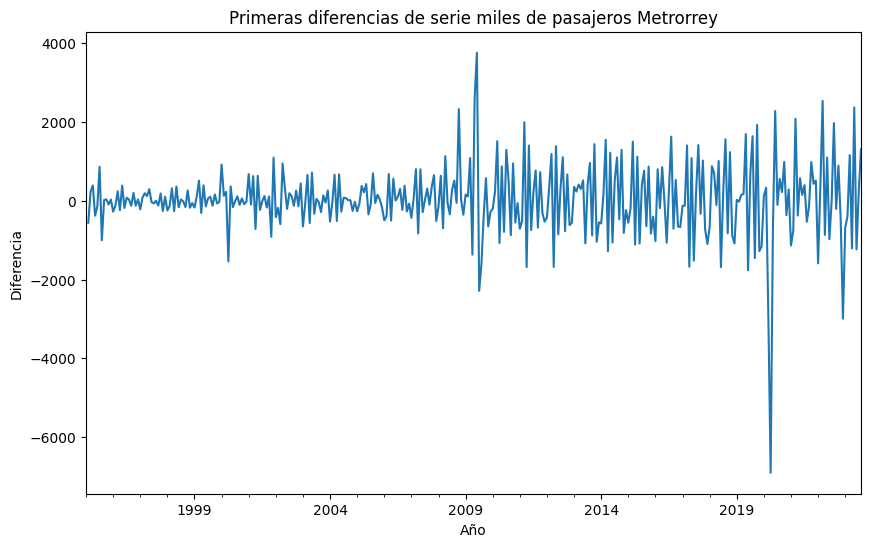

In [30]:
data['1ra_dif'] = data['miles de pasajeros'].diff()
data['1ra_dif'].plot()
plt.title('Primeras diferencias de serie miles de pasajeros Metrorrey')
plt.ylabel('Diferencia')
plt.xlabel('Año')
plt.show()

In [31]:
prueba_adf = adfuller(data['1ra_dif'].dropna())
pvalue = prueba_adf[1]
pvalue.round(2)

0.0

Se rechaza H0, por lo que la serie de 1ras diferencias sí es estacionaria.

* Miles de pasajeros - I(1)
* 1ras diferencias - I(0)

d) Realiza las graficas de autocorrelación de la serie estacionaria para verificar si la serie tiene o no un componente estacional 

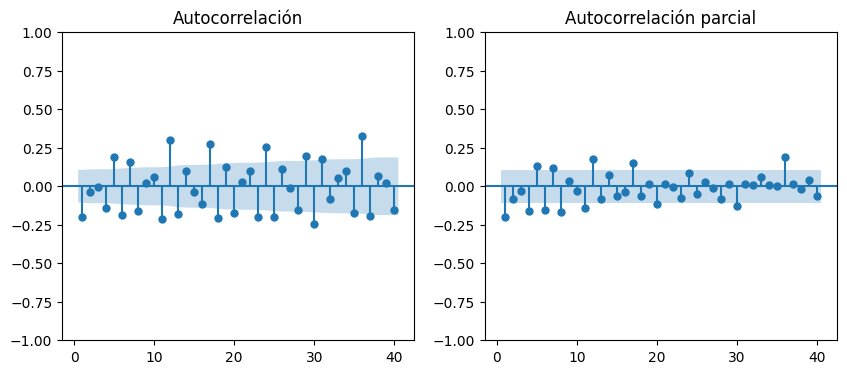

In [32]:
## graficas de autocorrelacion
ig, ax = plt.subplots(1,2, figsize = (10,4))

# 1er
plot_acf(data['1ra_dif']. dropna(), zero= False, lags = 40, ax = ax[0], title = 'Autocorrelación')
#2da
plot_pacf(data['1ra_dif']. dropna(), zero= False, lags = 40, ax = ax[1], title = 'Autocorrelación parcial')
plt.show();

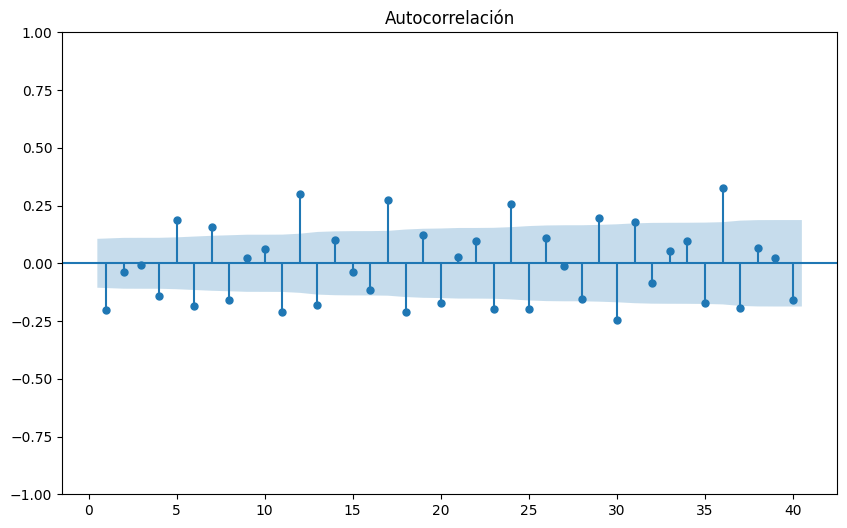

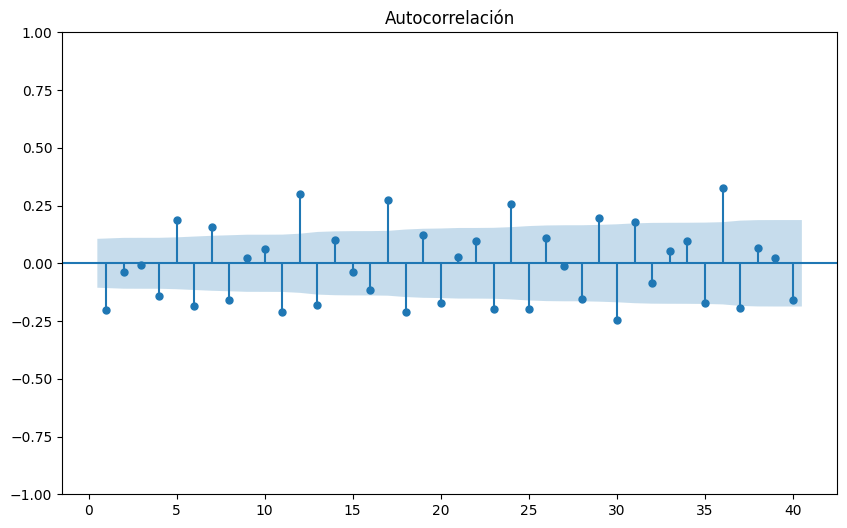

In [33]:
plot_acf(data['1ra_dif']. dropna(), zero= False, lags = 40,  title = 'Autocorrelación')

Se puede observar un patrón repetitivo, esencialmente cada 12 meses (despreciando los otros picos entre 15 y 20, así como el de entre 25 y 30)

e) Utiliza auto_arima para encontrar el orden del modelo arima, dando el parámetro information_criterion prueba y muestra el resultado, con aic, bic, hqic, oob, en caso de que resulten diferente elegir aic si tu matricula termina en par, sino termina en par elegir uno distinto a aic.

In [34]:
# obtener el orden, por aic
pm.auto_arima(data['miles de pasajeros'],
              start_p = 1, start_q = 1,
              max_p = 7, max_q = 7,
              ic = 'aic',
              seasonal = True,
              m = 12,
              start_P = 1, start_Q = 1,
              max_P = 7, max_Q = 7)

ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [35]:
# obtener el orden, por bic
pm.auto_arima(data['miles de pasajeros'],
              start_p = 1, start_q = 1,
              max_p = 7, max_q = 7,
              ic = 'bic',
              seasonal = True,
              m = 12,
              start_P = 1, start_Q = 1,
              max_P = 7, max_Q = 7)

ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [36]:
# obtener el orden, por hqic
pm.auto_arima(data['miles de pasajeros'],
              start_p = 1, start_q = 1,
              max_p = 7, max_q = 7,
              ic = 'hqic',
              seasonal = True,
              m = 12,
              start_P = 1, start_Q = 1,
              max_P = 7, max_Q = 7)

ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [37]:
# obtener el orden, por oob
pm.auto_arima(data['miles de pasajeros'],
              start_p = 1, start_q = 1,
              max_p = 7, max_q = 7,
              ic = 'oob',
              seasonal = True,
              m = 12,
              start_P = 1, start_Q = 1,
              max_P = 7, max_Q = 7)

ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

La serie de miles de pasajeros de metrorrey sigue un modelo SARIMA(1,1,3)(1,0,1,12)

f) Con el orden del modelo arima obtenido estima el modelo arima

In [38]:
model = ARIMA(data['miles de pasajeros'],
              order = (1,1,3),
              seasonal_order = (1,0,1,12))
results = model.fit()
print(results.summary())

c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                      
Dep. Variable:                 miles de pasajeros   No. Observations:                  344
Model:             ARIMA(1, 1, 3)x(1, 0, [1], 12)   Log Likelihood               -2772.718
Date:                            Sat, 04 Nov 2023   AIC                           5559.435
Time:                                    16:31:16   BIC                           5586.300
Sample:                                01-01-1995   HQIC                          5570.136
                                     - 08-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9517      0.037    -25.440      0.000      -1.025      -0.878
ma.L1          0.9123      0.050   

c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


g) Realiza la gráfica del pronóstico a 5 meses con los intervalos de confianza y la serie original desde 2021 

In [39]:
data.tail()

,miles de pasajeros,ingresos (miles de pesos),PMC-7,hold-winters,1ra_dif
mes,,,,,
2023-04-01,9523.669,38799.657,10464.836857,9547.424923,-1210.233
2023-05-01,11891.646,58511.798,10782.866714,10420.392806,2367.977
2023-06-01,10657.712,55684.063,NaN,12083.418919,-1233.934
2023-07-01,10894.497,56378.304,NaN,10988.177777,236.785
2023-08-01,12201.982,57821.901,NaN,11706.056494,1307.485


In [40]:
data2 = data.iloc[-32:]

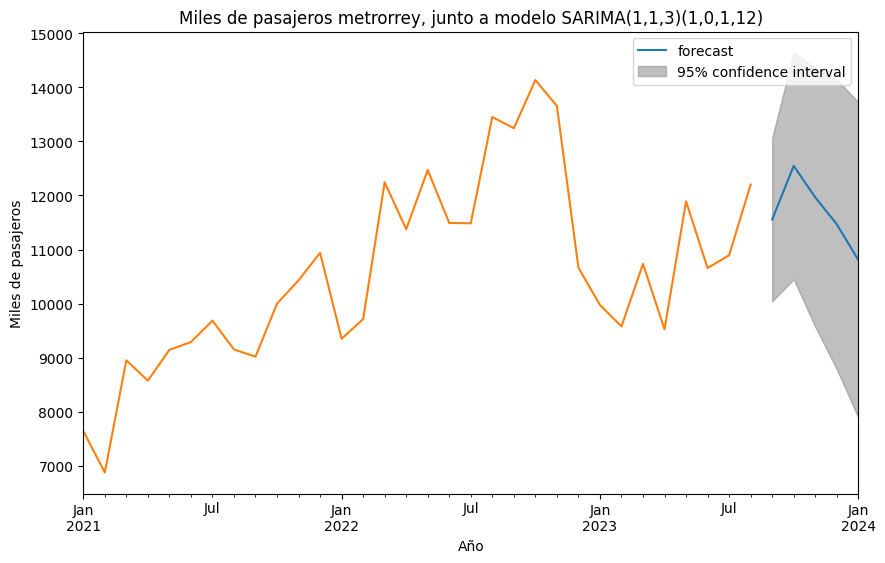

In [41]:
plot_predict(results, start = '2023-09-01', end = '2024-01-01')
data2['miles de pasajeros'].plot()
plt.title('Miles de pasajeros metrorrey, junto a modelo SARIMA(1,1,3)(1,0,1,12)')
plt.ylabel('Miles de pasajeros')
plt.xlabel('Año')
plt.show()

h) Realiza el pronostico a 5 meses con los intervalos de confianza

In [42]:
forecast = results.get_forecast(steps = 5)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

In [43]:
inicio = '2023-09-01'
fin = '2024-01-01'

In [44]:
pronostico_valor = forecast_mean[inicio:fin]
pronostico_intervalos = forecast_ci.loc[inicio:fin]
df_pronostico = pd.DataFrame({
    'pronostico' : pronostico_valor.round(2),
    'límite inferior': pronostico_intervalos['lower miles de pasajeros'].round(2),
    'límite superior' : pronostico_intervalos['upper miles de pasajeros'].round(2)
})

print(f"El pronostico a 5 meses con intervalos de confianza de miles de pasajeros de Metrorrey es el siguiente:\n{df_pronostico}")

El pronostico a 5 meses con intervalos de confianza de miles de pasajeros de Metrorrey es el siguiente:
            pronostico  límite inferior  límite superior
2023-09-01    11554.36         10041.67         13067.04
2023-10-01    12547.80         10450.34         14645.26
2023-11-01    11965.95          9570.32         14361.57
2023-12-01    11469.03          8788.40         14149.66
2024-01-01    10808.45          7887.74         13729.16


i) Calcula los ingresos y el intervalo de los ingreso multiplicando por $7.1

In [45]:
p_ingresos = pd.DataFrame({
    'Ingresos' : (df_pronostico['pronostico']*7.1).round(2),
    'L_inferior' : (df_pronostico['límite inferior']*7.1).round(2),
    'L_superior' : (df_pronostico['límite superior']*7.1)*round(2)
})

print(f"El pronóstico de ingresos (en miles de pesos) a 5 meses con intervalos de confianza es el siguiente:\n{p_ingresos}")

El pronóstico de ingresos (en miles de pesos) a 5 meses con intervalos de confianza es el siguiente:
            Ingresos  L_inferior  L_superior
2023-09-01  82035.96    71295.86  185551.968
2023-10-01  89089.38    74197.41  207962.692
2023-11-01  84958.24    67949.27  203934.294
2023-12-01  81430.11    62397.64  200925.172
2024-01-01  76740.00    56002.95  194954.072
